In [1]:
%load_ext autoreload
import uproot as ut
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import re
import sympy as sp
import math
import vector

from tqdm import tqdm

from utils import *
%autoreload 2

In [2]:
filename = "../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_Jun2021.root:sixBtree"
ttree = ut.open(filename)
branches = Branches(ttree)
preselection = Selection(branches,cuts={"njetcut":6},tag="preselection")
print(preselection)
baseline = Selection(branches,include=preselection,tag="baseline")
branches.calc_jet_dr(baseline.jets_selected)
print(baseline)

--- all preselection ---
Event Efficiency:   0.74
Selected Purity(6): 0.29
Passed Jet S/T:     0.69
--- all baseline ---
Event Efficiency:   1.0
Selected Purity(6): 0.29
Passed Jet S/T:     0.69


# Selection

In [29]:
btag_wps = [None]
for wp in [3,2,1,0]: btag_wps.append( Selection(branches,cuts=dict(btagcut=jet_btagWP[wp]),previous=btag_wps[-1],include=baseline,tag=f"{wplabels[wp]} btag",ignore_tag=True) )
btag_wps.pop(0)
btag_wps = reversed(btag_wps)

--- all null btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.21


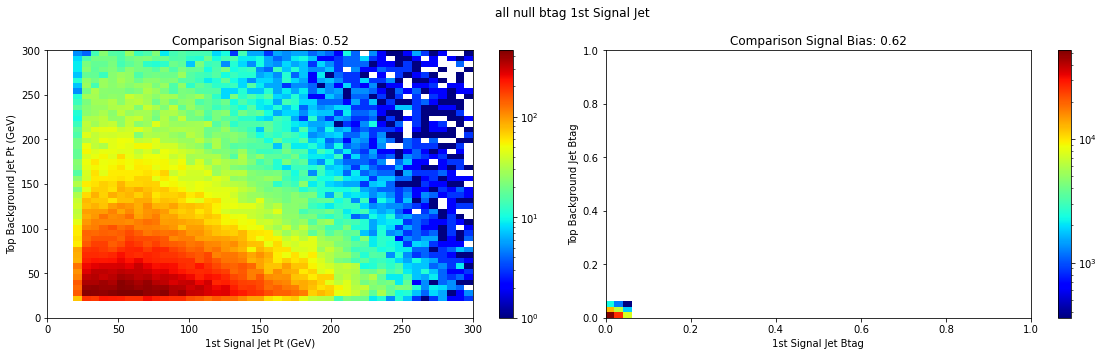

--- all loose btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.65


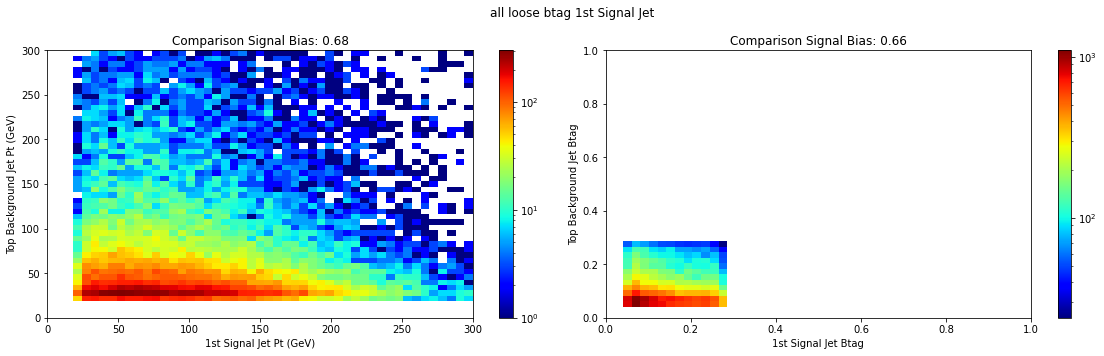

--- all medium btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.89


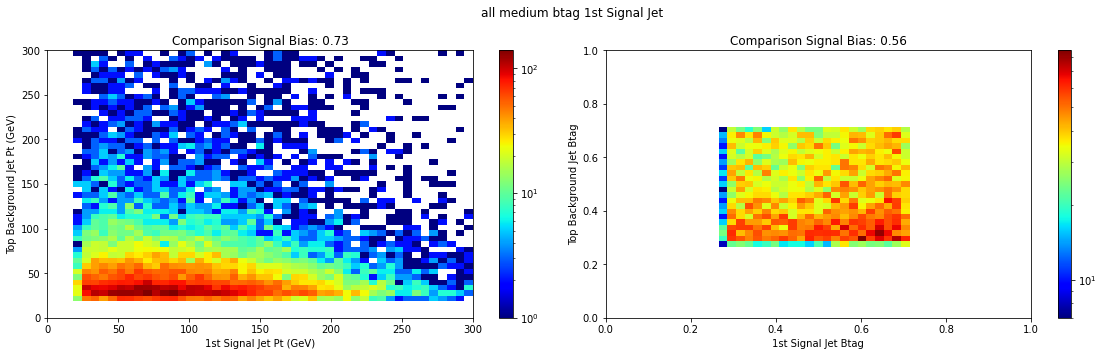

--- all tight btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.02
Passed Jet S/T:     0.94


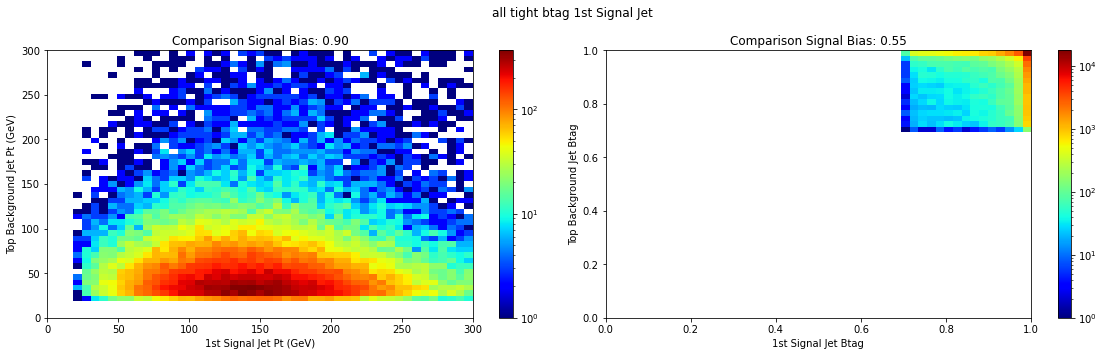

In [30]:
for btag_wp in btag_wps:
    jets_2d_ordered_study(btag_wp,njets=1,compare=1,log=1)